In [3]:
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rc('font', family='AppleGothic')
plt.rc('font', family='AppleGothic')
matplotlib.rc('axes', unicode_minus = False)
plt.rcParams['axes.unicode_minus'] = False
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
print("pandas version: ", pd.__version__)
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

pandas version:  1.4.3


In [4]:
df = pd.read_csv("/Users/hongna/Downloads/spending_meta_fin.csv", encoding='utf-8')

In [5]:
df.shape

(187437, 24)

### 지역별 분포

<AxesSubplot:xlabel='지역', ylabel='count'>

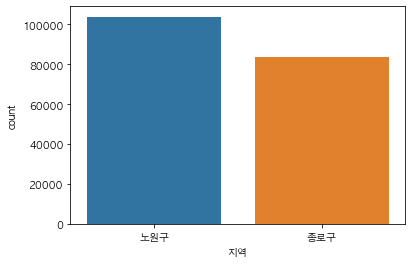

In [33]:
sns.countplot(x="지역", data = df)

### 연령 분포

<AxesSubplot:>

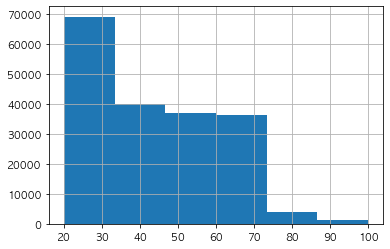

In [34]:
df["연령대"].hist(bins=6)

### 성별 소비처업종

<function matplotlib.pyplot.legend(*args, **kwargs)>

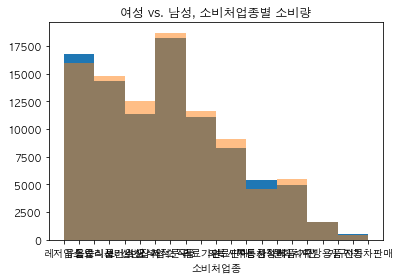

In [35]:
# df.hist(column = "소비처업종", by ="성별",figsize=(30,30))
plt.hist(df[df["성별"]=="남성"]["소비처업종"],label="남성", alpha=1)
plt.hist(df[df["성별"]=="여성"]["소비처업종"],label="여성", alpha=0.5)
plt.xlabel("소비처업종")
plt.title("여성 vs. 남성, 소비처업종별 소비량")
plt.legend

성별에 따른 차이는 크지 않음

### 연령별 성별 회당사용금액

In [36]:
df_agg = df.groupby(["성별","연령대"], as_index=False).agg('mean').round()
df_agg.round(2)

,성별,연령대,사용횟수,사용금액,회당사용금액,연,월,Card_ID,연회비금액,plcc,unmatched
0,남성,20,135.0,1608.0,18.0,2020.0,7.0,125.0,8159.0,0.0,0.0
1,남성,30,96.0,1855.0,28.0,2020.0,7.0,143.0,9651.0,0.0,0.0
2,남성,40,83.0,2010.0,30.0,2020.0,7.0,145.0,9794.0,0.0,0.0
3,남성,50,69.0,1847.0,30.0,2020.0,7.0,143.0,9828.0,0.0,0.0
4,남성,60,58.0,1701.0,31.0,2020.0,7.0,141.0,10114.0,0.0,0.0
5,남성,70,29.0,117.0,9.0,2020.0,7.0,167.0,13555.0,0.0,1.0
6,남성,80,30.0,120.0,10.0,2020.0,7.0,169.0,12717.0,0.0,1.0
7,남성,90,30.0,124.0,9.0,2020.0,7.0,169.0,11007.0,0.0,1.0
8,남성,100,4.0,56.0,16.0,2020.0,7.0,115.0,25500.0,0.0,1.0
9,여성,20,130.0,1741.0,17.0,2020.0,7.0,120.0,7976.0,0.0,0.0


In [37]:
df_pivot = df_agg.pivot("성별","연령대","회당사용금액")
df_pivot

연령대,20,30,40,50,60,70,80,90,100
성별,,,,,,,,,
남성,18.0,28.0,30.0,30.0,31.0,9.0,10.0,9.0,16.0
여성,17.0,26.0,29.0,31.0,33.0,9.0,8.0,9.0,20.0


<AxesSubplot:xlabel='연령대', ylabel='성별'>

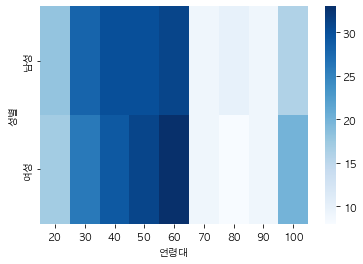

In [38]:
sns.heatmap(df_pivot, cmap = "Blues")

60대 여성의 회당사용금액이 가장 높음

### 연도별 소비처업종별 평균 사용금액

In [6]:
df_agg = df.groupby(["연","소비처업종"], as_index=False).agg('mean').round()
df_agg.round(2)

,연,소비처업종,사용횟수,사용금액,연령대,회당사용금액,월,Card_ID,연회비금액,plcc,unmatched
0,2020,가구,15.0,1005.0,43.0,199.0,8.0,152.0,13258.0,0.0,1.0
1,2020,가전,16.0,1213.0,43.0,155.0,8.0,151.0,13082.0,0.0,1.0
2,2020,광학제품,15.0,224.0,40.0,38.0,8.0,235.0,8129.0,0.0,0.0
3,2020,레저업소,41.0,180.0,39.0,7.0,8.0,202.0,19172.0,0.0,0.0
4,2020,문화취미,24.0,292.0,41.0,20.0,8.0,164.0,8739.0,0.0,0.0
5,2020,보건위생,24.0,529.0,42.0,33.0,8.0,151.0,13281.0,0.0,1.0
6,2020,사무통신,15.0,412.0,41.0,66.0,8.0,235.0,7029.0,0.0,0.0
7,2020,서적문구,59.0,1115.0,41.0,19.0,8.0,152.0,13437.0,0.0,1.0
8,2020,수리서비스,16.0,148.0,42.0,20.0,8.0,234.0,7283.0,0.0,0.0
9,2020,신변잡화,20.0,777.0,41.0,46.0,8.0,152.0,12728.0,0.0,1.0


In [7]:
df_pivot = df_agg.pivot("소비처업종","연","사용금액")
df_pivot

연,2020,2021
소비처업종,,
가구,1005.0,950.0
가전,1213.0,1578.0
광학제품,224.0,230.0
레저업소,180.0,199.0
문화취미,292.0,260.0
보건위생,529.0,539.0
사무통신,412.0,416.0
서적문구,1115.0,1401.0
수리서비스,148.0,136.0


<AxesSubplot:xlabel='소비처업종'>

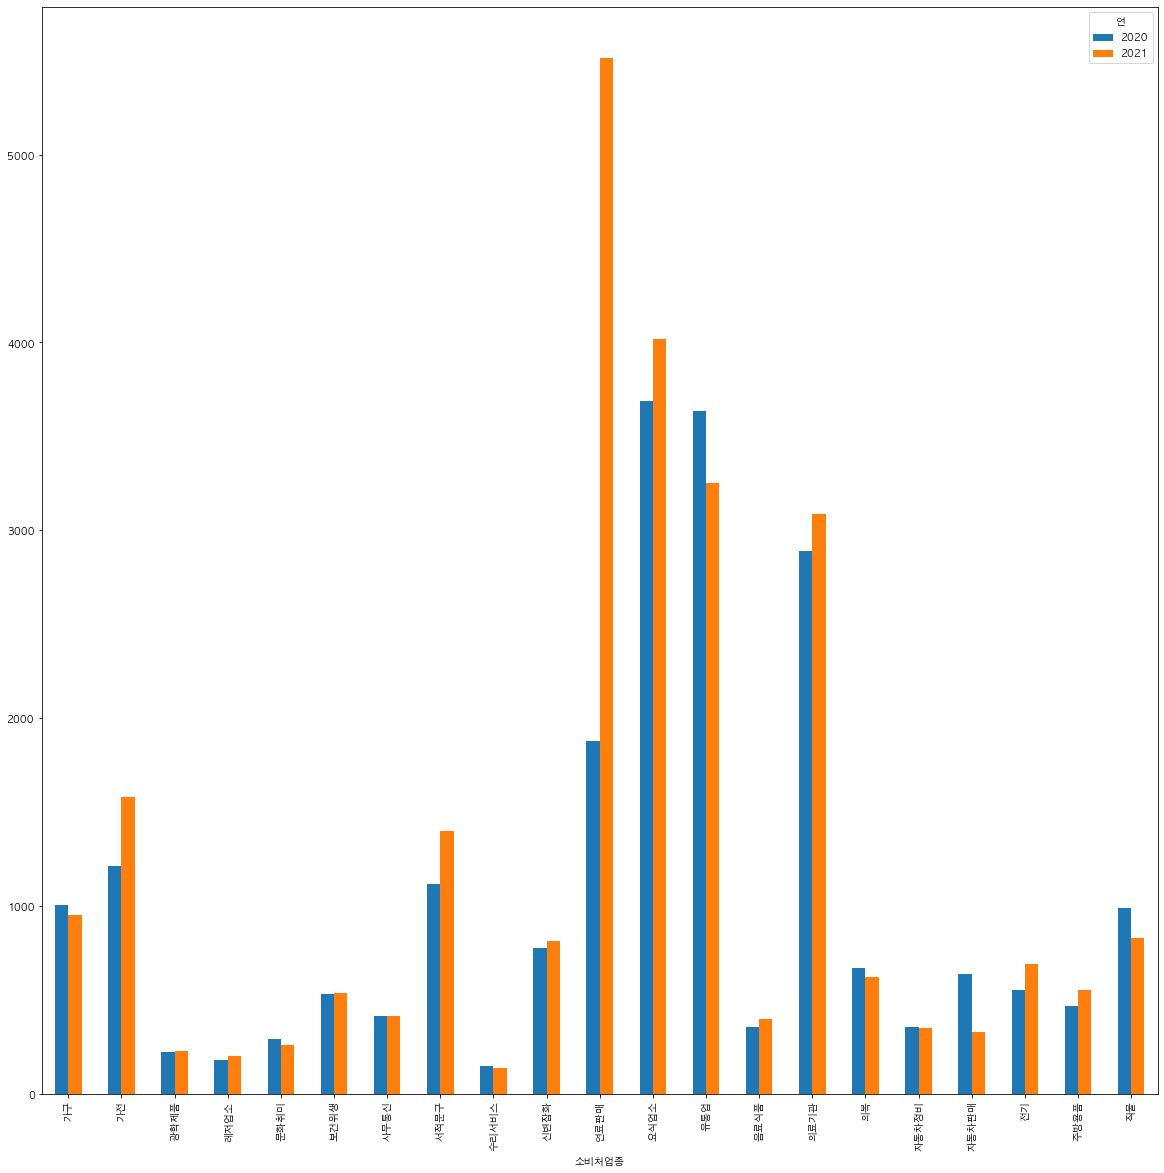

In [8]:
df_pivot.plot.bar(figsize=(20,20))

### 연령대별 사용금액

Text(0.5, 1.0, '연령대별 평균사용금액')

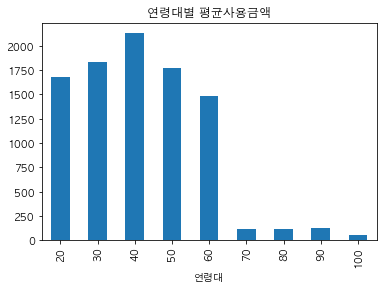

In [39]:
df.groupby('연령대').mean()['사용금액'].plot.bar()
plt.title("연령대별 평균사용금액")

40대 소비금액 가장 높음  
70대 이상은 거의 없음

### 연령대별 사용횟수

Text(0.5, 1.0, '연령대별 사용횟수')

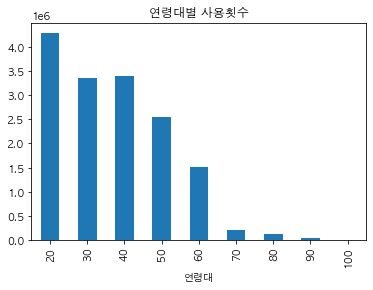

In [40]:
round(df.groupby('연령대').sum()['사용횟수']).plot.bar()
plt.title("연령대별 사용횟수")

소비금액은 40대가 가장 높은 것에 비해 사용횟수는 20대가 가장 높음  -> 20대는 찔끔찔끔 많이 사용

### 업종별 회당사용금액

In [45]:
df_agg = df.groupby(["소비처업종","회당사용금액"], as_index=False).agg('mean').round()
df_agg.round(2)

,소비처업종,회당사용금액,사용횟수,사용금액,연령대,연,월,Card_ID,연회비금액,plcc,unmatched
0,가구,1,55.0,55.0,38.0,2020.0,7.0,133.0,7400.0,0.0,1.0
1,가구,2,56.0,113.0,44.0,2020.0,8.0,144.0,11850.0,0.0,1.0
2,가구,3,28.0,82.0,40.0,2020.0,8.0,156.0,11350.0,0.0,1.0
3,가구,4,25.0,100.0,37.0,2020.0,7.0,160.0,14355.0,0.0,1.0
4,가구,5,23.0,115.0,55.0,2020.0,8.0,156.0,7400.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5148,직물,2180,4.0,8720.0,60.0,2020.0,8.0,121.0,7000.0,0.0,1.0
5149,직물,2184,4.0,8735.0,50.0,2020.0,6.0,146.0,12000.0,1.0,1.0
5150,직물,3387,4.0,13547.0,40.0,2020.0,7.0,201.0,13000.0,1.0,1.0
5151,직물,3597,4.0,14388.0,50.0,2020.0,5.0,117.0,7000.0,1.0,1.0


In [46]:
df_pivot = df_agg.pivot(columns = "소비처업종",values="회당사용금액").mean()
df_pivot

소비처업종
가구       450.630872
가전       664.506522
광학제품     245.062827
레저업소      48.218391
문화취미     184.716578
보건위생     453.797403
사무통신     383.899038
서적문구     262.888889
수리서비스    180.079602
신변잡화     309.054124
연료판매     151.588235
요식업소      86.733333
유통업       86.344371
음료식품     191.655502
의료기관     344.762148
의복       344.139594
자동차정비    300.574359
자동차판매    291.317829
전기       208.351145
주방용품     411.932099
직물       325.427692
dtype: float64

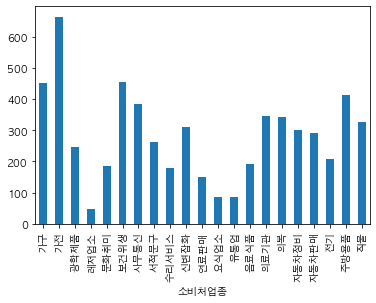

<Figure size 720x360 with 0 Axes>

In [47]:
df_pivot.plot.bar()
plt.figure(figsize=(10, 5))
plt.show()

### 업종별 사용금액

In [48]:
df_pivot = df_agg.pivot(columns = "소비처업종",values="사용금액").mean()
df_pivot

소비처업종
가구        2215.194631
가전        4955.773913
광학제품      1189.659686
레저업소       128.563218
문화취미      1825.898396
보건위생      3678.288312
사무통신      2288.375000
서적문구      2702.203065
수리서비스      941.641791
신변잡화      5535.953608
연료판매      8151.053922
요식업소      3931.006667
유통업      25956.900662
음료식품      3517.535885
의료기관     17706.309463
의복        2876.697970
자동차정비     2150.915385
자동차판매     1313.511628
전기         990.687023
주방용품      1924.425926
직물        3150.156923
dtype: float64

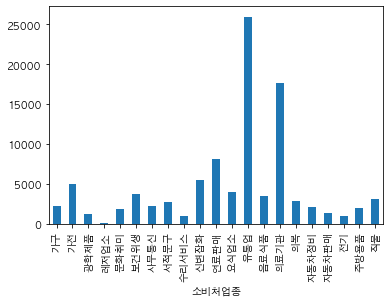

In [49]:
df_pivot.plot.bar()
plt.show()

업종별 회당사용금액과 사용금액을 살펴본 결과,  
가구, 가전, 자동차판매 등 가격이 비싼 제품들을 나눠서 결제하고  
요식업, 유통업 등 가격이 낮은 업종들에는 한번에 결제

### 업종별 사용횟수

In [50]:
df_agg = df.groupby(["소비처업종","사용횟수"], as_index=False).agg('mean').round()
df_agg.round(2)

,소비처업종,사용횟수,사용금액,연령대,회당사용금액,연,월,Card_ID,연회비금액,plcc,unmatched
0,가구,1,180.0,30.0,180.0,2020.0,11.0,173.0,0.0,0.0,1.0
1,가구,2,69.0,42.0,34.0,2020.0,8.0,113.0,8000.0,0.0,1.0
2,가구,3,66.0,44.0,22.0,2020.0,8.0,110.0,9143.0,0.0,1.0
3,가구,4,1465.0,42.0,366.0,2020.0,7.0,153.0,14353.0,0.0,1.0
4,가구,5,704.0,41.0,141.0,2020.0,8.0,150.0,11129.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
6856,직물,81,139.0,50.0,2.0,2020.0,6.0,177.0,15000.0,0.0,1.0
6857,직물,87,132.0,30.0,2.0,2020.0,11.0,147.0,27000.0,1.0,1.0
6858,직물,89,79.0,40.0,1.0,2020.0,9.0,147.0,27000.0,1.0,1.0
6859,직물,104,164.0,60.0,2.0,2020.0,9.0,145.0,15000.0,1.0,1.0


In [51]:
df_pivot = df_agg.pivot(columns = "소비처업종",values="사용횟수").mean()
df_pivot

소비처업종
가구         35.448276
가전         40.873418
광학제품       43.352941
레저업소      300.220745
문화취미      101.431034
보건위생      106.204301
사무통신       47.568182
서적문구      769.394198
수리서비스      54.813725
신변잡화       66.878049
연료판매      845.019718
요식업소     1420.279055
유통업      1017.710419
음료식품      150.003788
의료기관      404.880484
의복         98.625731
자동차정비     171.506122
자동차판매      36.915254
전기         32.098039
주방용품       37.309859
직물         43.036145
dtype: float64

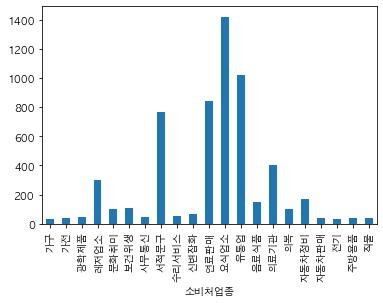

In [52]:
df_pivot.plot.bar()
plt.show()

### 지역별 소비처업종

array([[<AxesSubplot:title={'center':'가구'}>,
        <AxesSubplot:title={'center':'가전'}>,
        <AxesSubplot:title={'center':'광학제품'}>,
        <AxesSubplot:title={'center':'레저업소'}>,
        <AxesSubplot:title={'center':'문화취미'}>],
       [<AxesSubplot:title={'center':'보건위생'}>,
        <AxesSubplot:title={'center':'사무통신'}>,
        <AxesSubplot:title={'center':'서적문구'}>,
        <AxesSubplot:title={'center':'수리서비스'}>,
        <AxesSubplot:title={'center':'신변잡화'}>],
       [<AxesSubplot:title={'center':'연료판매'}>,
        <AxesSubplot:title={'center':'요식업소'}>,
        <AxesSubplot:title={'center':'유통업'}>,
        <AxesSubplot:title={'center':'음료식품'}>,
        <AxesSubplot:title={'center':'의료기관'}>],
       [<AxesSubplot:title={'center':'의복'}>,
        <AxesSubplot:title={'center':'자동차정비'}>,
        <AxesSubplot:title={'center':'자동차판매'}>,
        <AxesSubplot:title={'center':'전기'}>,
        <AxesSubplot:title={'center':'주방용품'}>],
       [<AxesSubplot:title={'center':'직물'}>, <AxesSubplot:>,
 

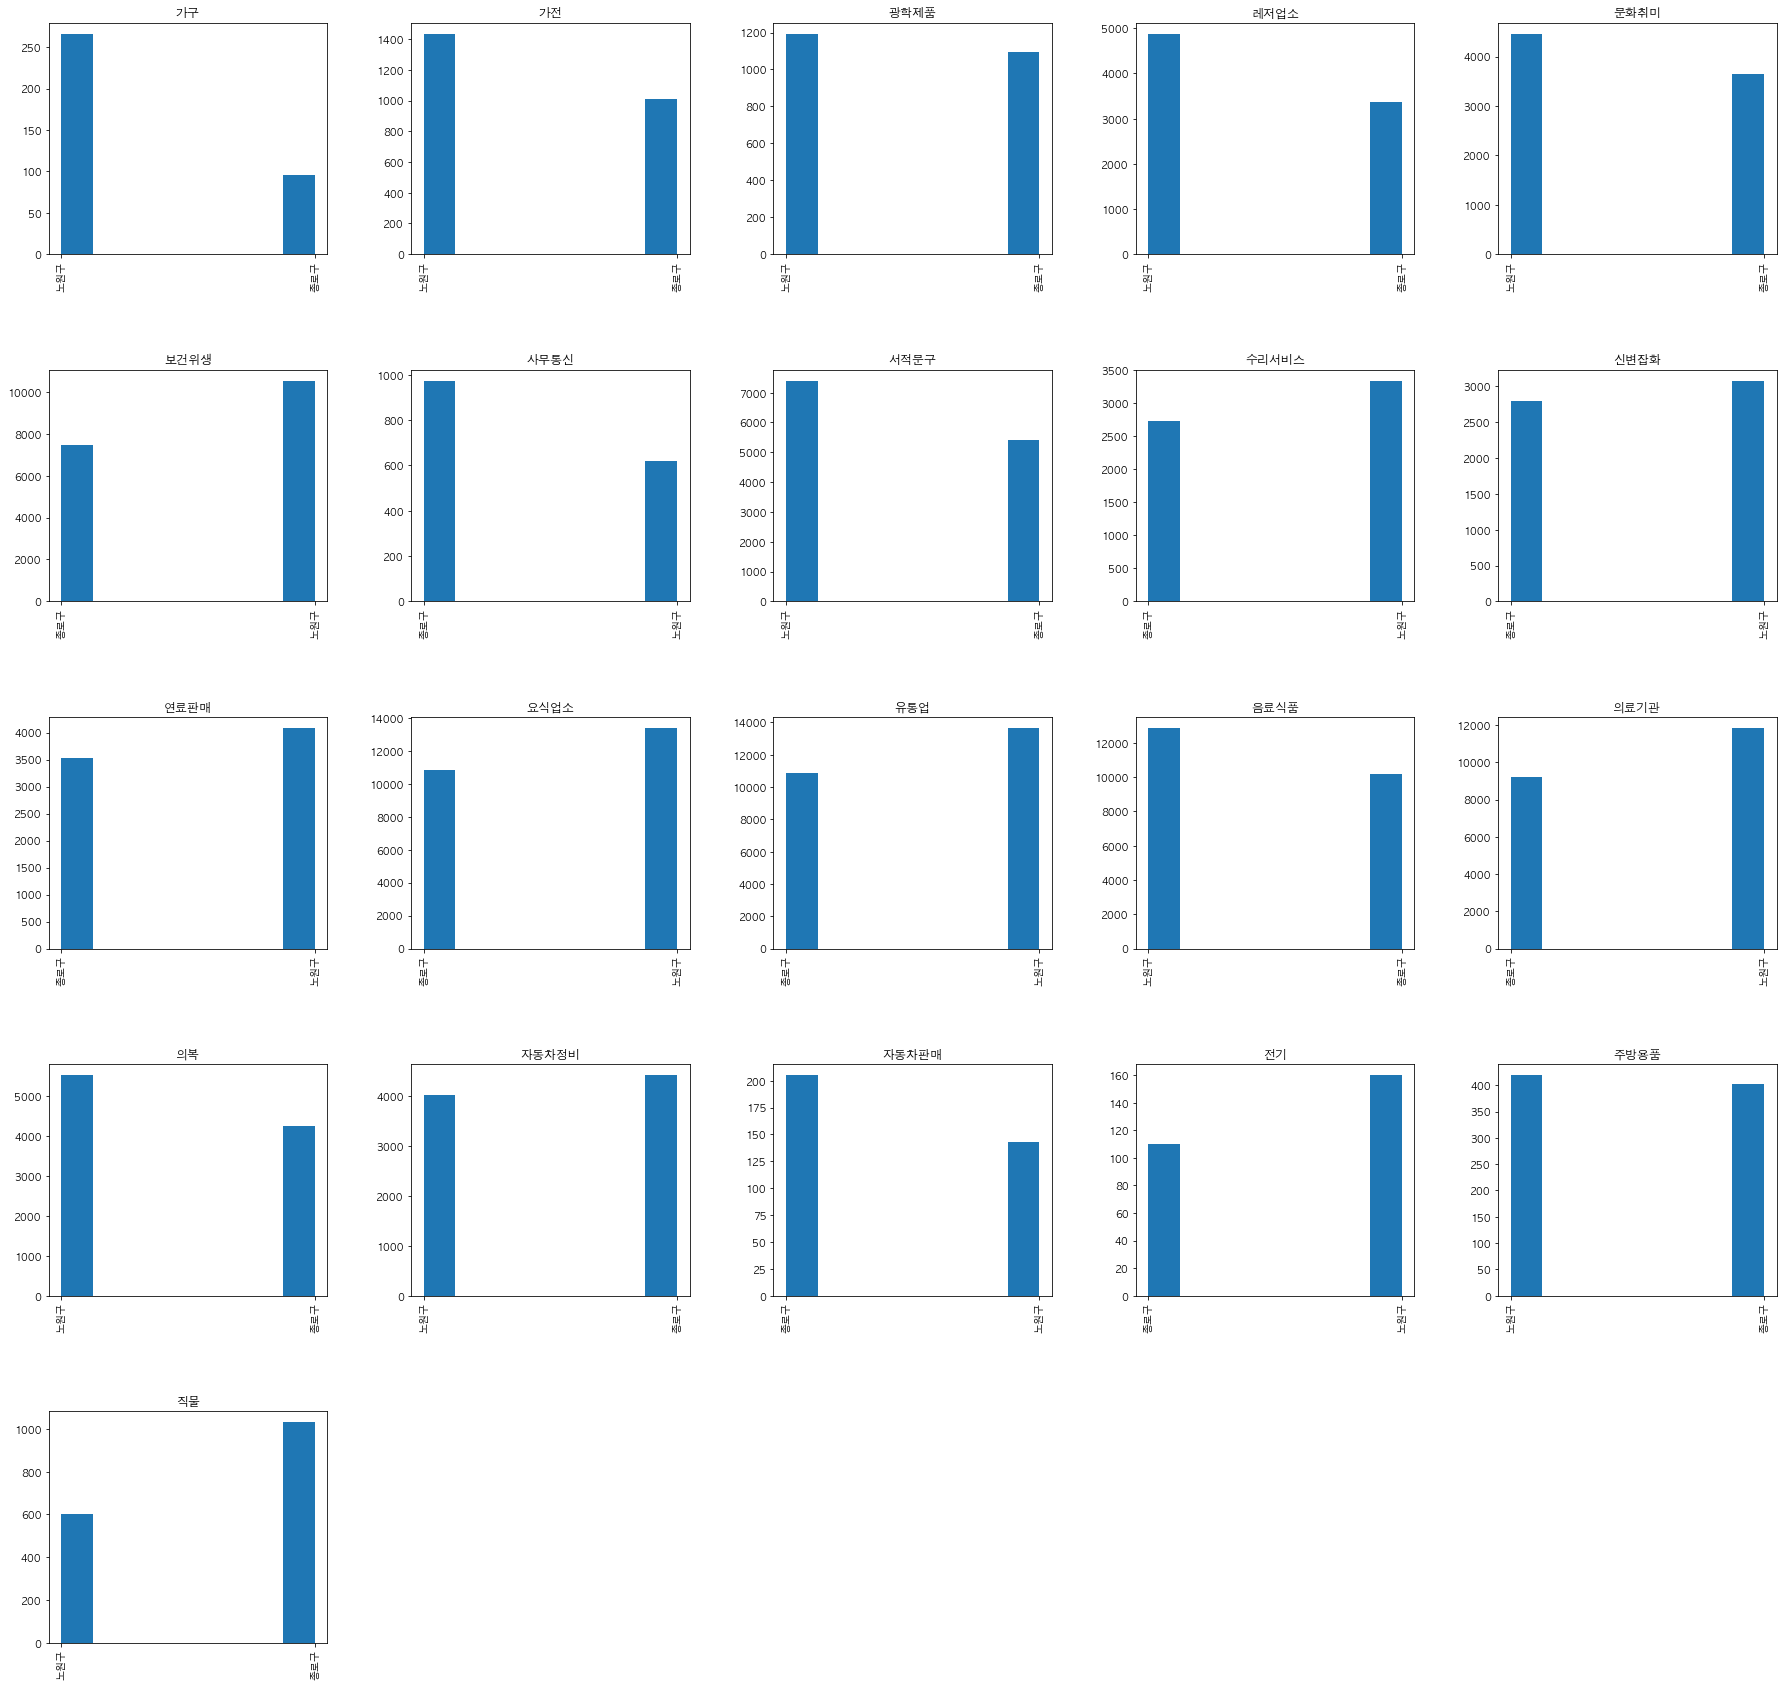

In [53]:
df.hist(column = "지역", by ="소비처업종",figsize=(30,30),bins=8)

### 혜택분야 분포 확인

<AxesSubplot:xlabel='혜택분야', ylabel='count'>

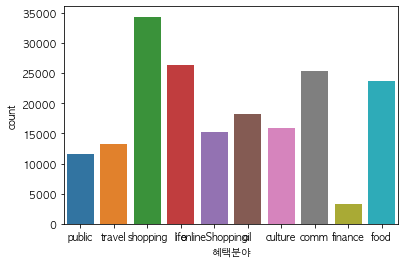

In [55]:
sns.countplot(x="혜택분야",data=df)

### 연령별 신용카드/체크카드 사용자 수

가설: 체크카드 사용자는 20대에 많을 것이다.

<AxesSubplot:xlabel='연령대', ylabel='count'>

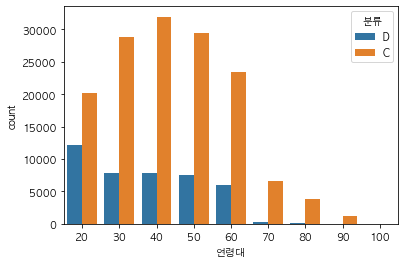

In [57]:
sns.countplot(x="연령대", hue="분류", data=df)

20대의 경우에도 신용카드 사용자가 많음. 전체적으로도 신용카드 사용자가 압도적으로 많음. 70대 이상부터는 체크카드 사용자 거의 없음.  
-> 신용카드 상품 추천이 나을 듯

### 연령대별 혜택 분야

<AxesSubplot:xlabel='연령대', ylabel='count'>

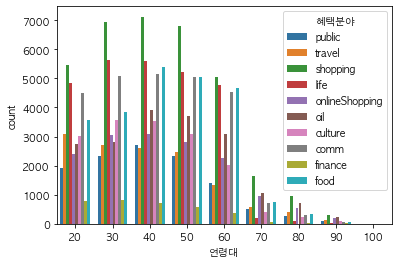

In [60]:
sns.countplot(x="연령대", hue="혜택분야", data=df)

전 연령대에서 shopping이 가장 많음.

### 소비처업종별 혜택분야 

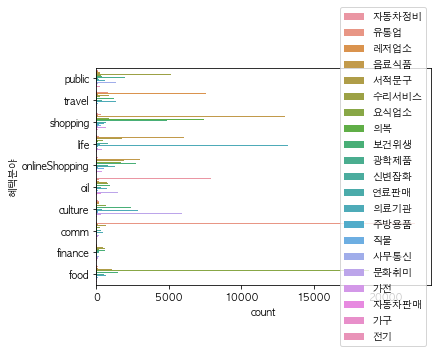

In [62]:
sns.countplot(y="혜택분야", hue="소비처업종", data=df)
plt.legend(loc='center right')

### 각 혜택분야별 항목별 평균 사용금액

Text(0.5, 1.0, '혜택분야별 평균 사용금액')

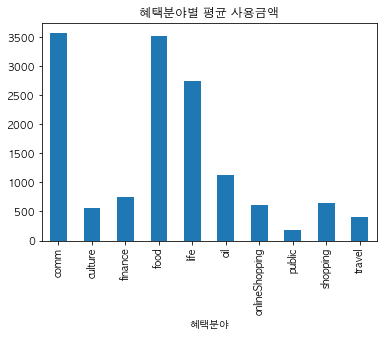

In [64]:
df.groupby('혜택분야').mean()['사용금액'].plot.bar()
plt.title('혜택분야별 평균 사용금액')

### 각 혜택분야 항목별 평균 사용횟수

Text(0.5, 1.0, '혜택분야별 평균 사용횟수')

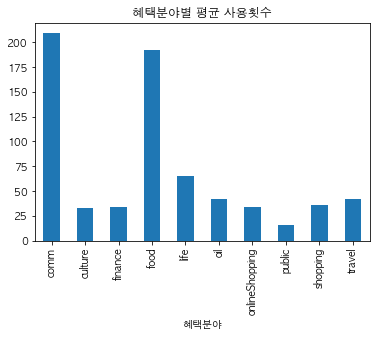

In [65]:
df.groupby('혜택분야').mean()['사용횟수'].plot.bar()
plt.title('혜택분야별 평균 사용횟수')

### 각 혜택분야 항목별 평균 회당사용금액

Text(0.5, 1.0, '혜택분야별 평균 회당사용금액')

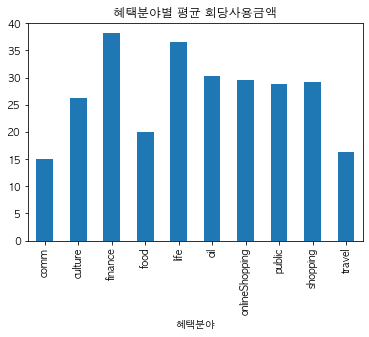

In [66]:
df.groupby('혜택분야').mean()['회당사용금액'].plot.bar()
plt.title('혜택분야별 평균 회당사용금액')

### 연령대별 소비처평균 사용금액

In [9]:
df_agg = df.groupby(["연령대","소비처업종"], as_index=False).agg('mean').round()
df_agg.round(2)

,연령대,소비처업종,사용횟수,사용금액,회당사용금액,연,월,Card_ID,연회비금액,plcc,unmatched
0,20,가구,16.0,267.0,54.0,2020.0,8.0,152.0,13963.0,0.0,1.0
1,20,가전,15.0,756.0,130.0,2020.0,7.0,151.0,13348.0,0.0,1.0
2,20,광학제품,14.0,246.0,33.0,2020.0,7.0,241.0,6849.0,0.0,0.0
3,20,레저업소,94.0,415.0,6.0,2020.0,7.0,206.0,17557.0,0.0,0.0
4,20,문화취미,35.0,382.0,17.0,2020.0,7.0,64.0,1252.0,0.0,0.0
5,20,보건위생,30.0,580.0,22.0,2020.0,7.0,153.0,13002.0,0.0,1.0
6,20,사무통신,15.0,293.0,35.0,2020.0,7.0,239.0,6780.0,0.0,0.0
7,20,서적문구,94.0,1568.0,13.0,2020.0,7.0,153.0,13657.0,0.0,1.0
8,20,수리서비스,18.0,137.0,18.0,2020.0,7.0,236.0,5696.0,0.0,0.0
9,20,신변잡화,26.0,837.0,30.0,2020.0,7.0,153.0,13106.0,0.0,1.0


In [10]:
df_pivot = df_agg.pivot("연령대","소비처업종","사용금액")
df_pivot

소비처업종,가구,가전,광학제품,레저업소,문화취미,보건위생,사무통신,서적문구,수리서비스,신변잡화,연료판매,요식업소,유통업,음료식품,의료기관,의복,자동차정비,자동차판매,전기,주방용품,직물
연령대,,,,,,,,,,,,,,,,,,,,,
20,267.0,756.0,246.0,415.0,382.0,580.0,293.0,1568.0,137.0,837.0,604.0,6240.0,3119.0,279.0,1128.0,745.0,178.0,1227.0,288.0,263.0,403.0
30,988.0,1444.0,394.0,123.0,260.0,608.0,497.0,1413.0,150.0,924.0,1714.0,4364.0,4509.0,352.0,2474.0,648.0,375.0,301.0,394.0,248.0,821.0
40,1278.0,1428.0,174.0,79.0,347.0,673.0,517.0,1362.0,151.0,845.0,5023.0,4027.0,5132.0,443.0,3726.0,699.0,416.0,572.0,446.0,902.0,806.0
50,1173.0,1495.0,138.0,78.0,245.0,527.0,486.0,940.0,138.0,767.0,2325.0,3387.0,3851.0,416.0,3920.0,673.0,444.0,577.0,842.0,456.0,1237.0
60,1309.0,1415.0,156.0,93.0,237.0,364.0,397.0,749.0,170.0,734.0,2604.0,2037.0,2085.0,400.0,4046.0,747.0,368.0,484.0,722.0,468.0,1556.0
70,138.0,114.0,116.0,119.0,118.0,118.0,113.0,114.0,117.0,120.0,117.0,118.0,115.0,117.0,117.0,118.0,116.0,112.0,120.0,107.0,107.0
80,130.0,116.0,120.0,124.0,120.0,119.0,113.0,120.0,121.0,120.0,121.0,117.0,120.0,122.0,118.0,118.0,124.0,142.0,135.0,124.0,123.0
90,127.0,116.0,130.0,118.0,132.0,123.0,127.0,120.0,135.0,128.0,133.0,120.0,126.0,125.0,125.0,132.0,123.0,112.0,100.0,132.0,124.0
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,58.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='연령대'>

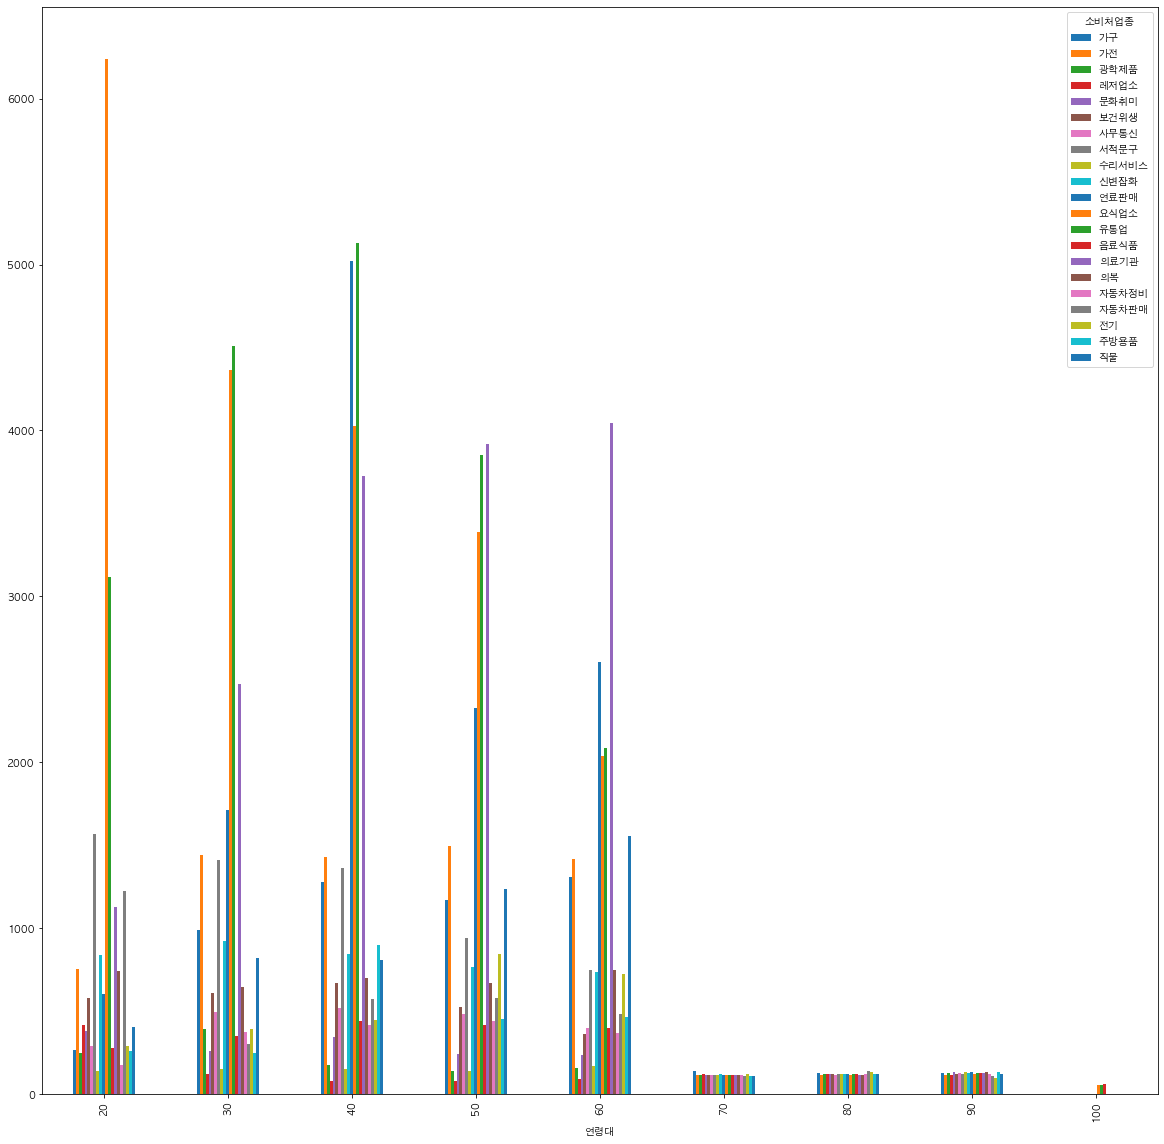

In [11]:
df_pivot.plot.bar(figsize=(20,20))

### 성별 소비처업종별 사용금액

In [12]:
df_agg = df.groupby(["성별","소비처업종"], as_index=False).agg('mean').round()
df_agg.round(2)

,성별,소비처업종,사용횟수,사용금액,연령대,회당사용금액,연,월,Card_ID,연회비금액,plcc,unmatched
0,남성,가구,16.0,986.0,45.0,188.0,2020.0,7.0,149.0,11087.0,0.0,1.0
1,남성,가전,16.0,1432.0,43.0,167.0,2020.0,7.0,151.0,13287.0,0.0,1.0
2,남성,광학제품,15.0,237.0,40.0,40.0,2020.0,7.0,234.0,7767.0,0.0,0.0
3,남성,레저업소,56.0,254.0,37.0,7.0,2020.0,7.0,203.0,19058.0,0.0,0.0
4,남성,문화취미,24.0,285.0,41.0,20.0,2020.0,7.0,164.0,8707.0,0.0,0.0
5,남성,보건위생,22.0,438.0,41.0,33.0,2020.0,7.0,152.0,13235.0,0.0,1.0
6,남성,사무통신,16.0,450.0,41.0,62.0,2020.0,7.0,236.0,6463.0,0.0,0.0
7,남성,서적문구,58.0,1180.0,42.0,19.0,2020.0,7.0,152.0,13542.0,0.0,1.0
8,남성,수리서비스,17.0,142.0,41.0,18.0,2020.0,7.0,235.0,7340.0,0.0,0.0
9,남성,신변잡화,19.0,813.0,42.0,48.0,2020.0,7.0,152.0,12766.0,0.0,1.0


In [13]:
df_pivot = df_agg.pivot("성별","소비처업종","사용금액")
df_pivot

소비처업종,가구,가전,광학제품,레저업소,문화취미,보건위생,사무통신,서적문구,수리서비스,신변잡화,연료판매,요식업소,유통업,음료식품,의료기관,의복,자동차정비,자동차판매,전기,주방용품,직물
성별,,,,,,,,,,,,,,,,,,,,,
남성,986.0,1432.0,237.0,254.0,285.0,438.0,450.0,1180.0,142.0,813.0,2359.0,4235.0,3232.0,301.0,2983.0,472.0,443.0,657.0,597.0,644.0,824.0
여성,1008.0,1101.0,214.0,99.0,288.0,619.0,374.0,1146.0,151.0,758.0,2642.0,3255.0,3910.0,424.0,2868.0,809.0,242.0,404.0,555.0,356.0,1073.0


<AxesSubplot:xlabel='성별'>

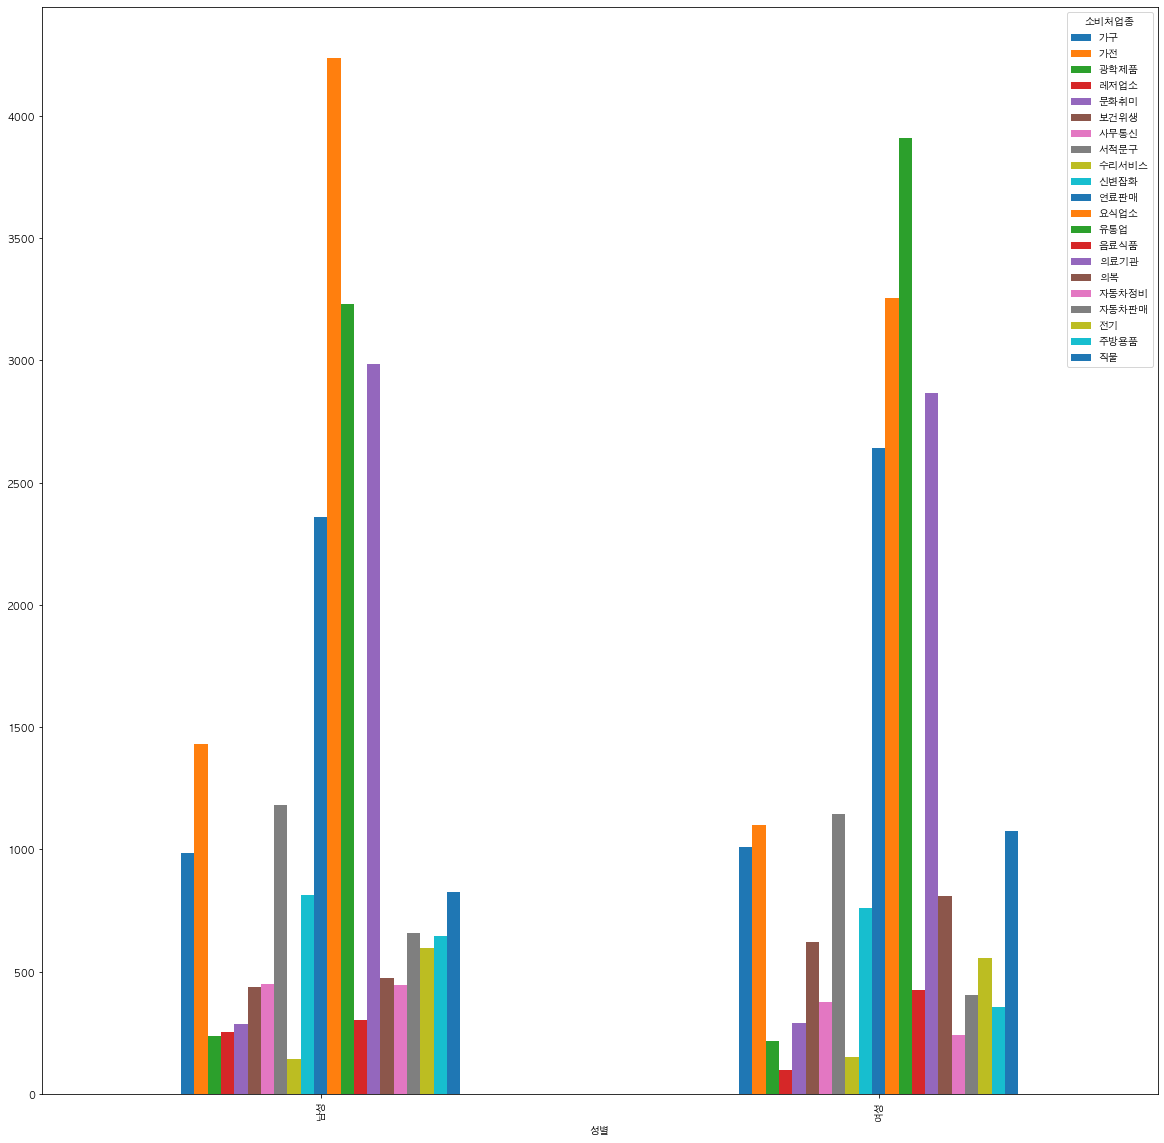

In [14]:
df_pivot.plot.bar(figsize=(20,20))

### 지역별 소비처업종별 사용금액

In [15]:
df_agg = df.groupby(["지역","소비처업종"], as_index=False).agg('mean').round()
df_agg.round(2)

,지역,소비처업종,사용횟수,사용금액,연령대,회당사용금액,연,월,Card_ID,연회비금액,plcc,unmatched
0,노원구,가구,13.0,1246.0,42.0,250.0,2020.0,7.0,152.0,13598.0,0.0,1.0
1,노원구,가전,15.0,1156.0,42.0,186.0,2020.0,7.0,151.0,13364.0,0.0,1.0
2,노원구,광학제품,16.0,205.0,40.0,34.0,2020.0,7.0,234.0,8132.0,0.0,0.0
3,노원구,레저업소,36.0,157.0,38.0,7.0,2020.0,7.0,203.0,19057.0,0.0,0.0
4,노원구,문화취미,23.0,233.0,41.0,19.0,2020.0,7.0,165.0,8862.0,0.0,0.0
5,노원구,보건위생,23.0,519.0,42.0,35.0,2020.0,7.0,152.0,13142.0,0.0,1.0
6,노원구,사무통신,18.0,313.0,43.0,56.0,2020.0,7.0,231.0,7458.0,0.0,0.0
7,노원구,서적문구,24.0,324.0,41.0,19.0,2020.0,7.0,152.0,13486.0,0.0,1.0
8,노원구,수리서비스,16.0,132.0,42.0,17.0,2020.0,7.0,234.0,7055.0,0.0,0.0
9,노원구,신변잡화,18.0,282.0,42.0,33.0,2020.0,7.0,152.0,12550.0,0.0,1.0


In [16]:
df_pivot = df_agg.pivot("지역","소비처업종","사용금액")
df_pivot

소비처업종,가구,가전,광학제품,레저업소,문화취미,보건위생,사무통신,서적문구,수리서비스,신변잡화,연료판매,요식업소,유통업,음료식품,의료기관,의복,자동차정비,자동차판매,전기,주방용품,직물
지역,,,,,,,,,,,,,,,,,,,,,
노원구,1246.0,1156.0,205.0,157.0,233.0,519.0,313.0,324.0,132.0,282.0,3765.0,2527.0,3160.0,370.0,3057.0,411.0,355.0,612.0,534.0,619.0,367.0
종로구,312.0,1440.0,247.0,221.0,353.0,546.0,476.0,2308.0,164.0,1334.0,1023.0,5251.0,4086.0,356.0,2753.0,988.0,350.0,559.0,639.0,338.0,1307.0


<AxesSubplot:xlabel='지역'>

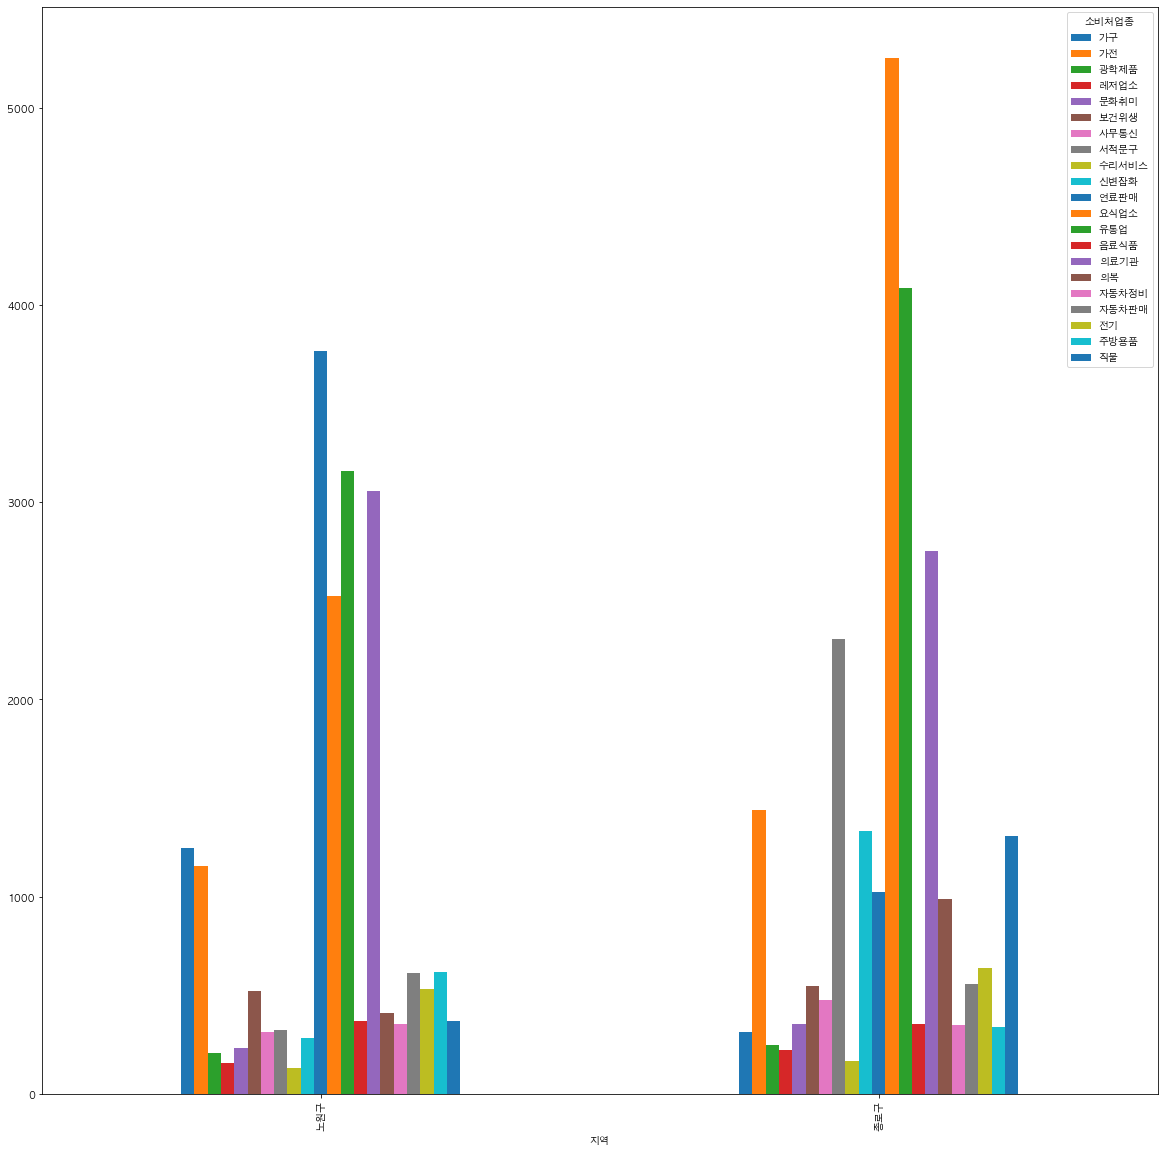

In [29]:
df_pivot.plot.bar(figsize=(20,20))

지역별 소비처업종별 사용금액은 차이가 있음
노원구는 연료판매, 종로구는 요식업소에서 가장 높음

### 연령대별 plcc개수

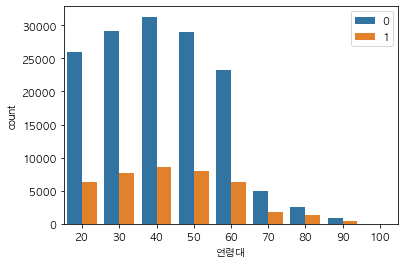

In [18]:
sns.countplot(x="연령대", hue="plcc", data=df)
plt.legend(loc='upper right')
plt.show()

연령대별 plcc 수 큰 차이 없음

### 연령대별 혜택분야 수

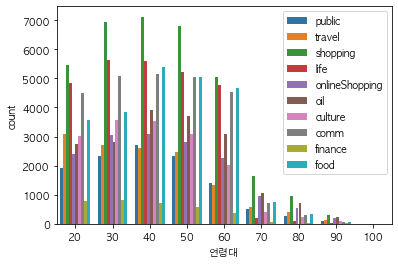

In [21]:
sns.countplot(x="연령대", hue="혜택분야", data=df)
plt.legend(loc='upper right')
plt.show()

주로 shopping이 가장 높음.

### 연도별 연회비범주 수

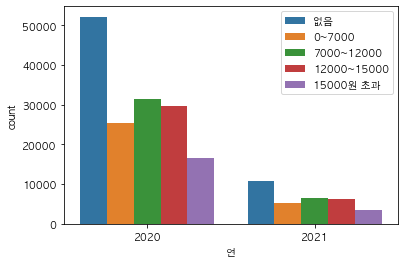

In [22]:
sns.countplot(x="연", hue="연회비범주", data=df)
plt.legend(loc='upper right')
plt.show()

연도별 연회비범주 수의 순위 큰 차이 없음

### 성별 연회비범주별 수

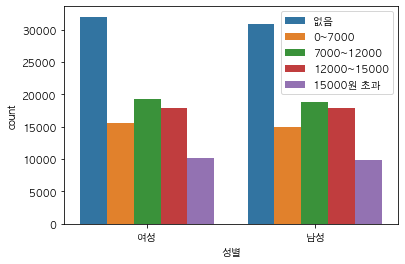

In [23]:
sns.countplot(x="성별", hue="연회비범주", data=df)
plt.legend(loc='upper right')
plt.show()

성별 연회비범주별 수 큰 차이 없음

### 지역별 연회비범주 수

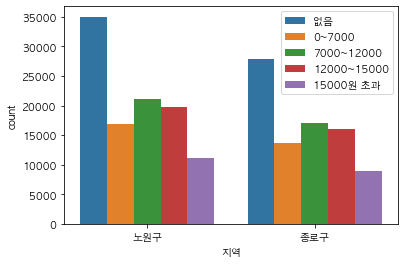

In [24]:
sns.countplot(x="지역", hue="연회비범주", data=df)
plt.legend(loc='upper right')
plt.show()

지역별 연회비범주 수 큰 차이 없음

### 연도별 plcc 수

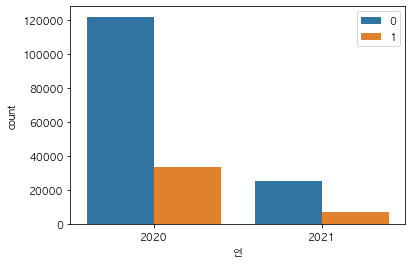

In [26]:
sns.countplot(x="연", hue="plcc", data=df)
plt.legend(loc='upper right')
plt.show()

연도별 plcc 수 큰 차이 없음

### 성별 plcc 수

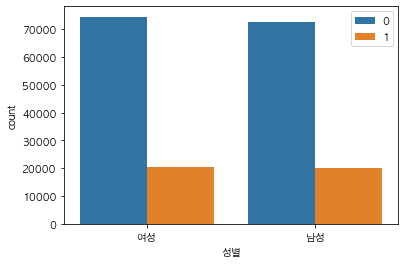

In [27]:
sns.countplot(x="성별", hue="plcc", data=df)
plt.legend(loc='upper right')
plt.show()

성별 plcc 수 큰 차이 없음

### 지역별 plcc 수

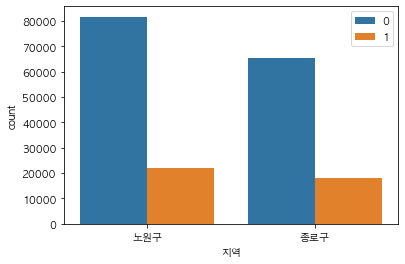

In [29]:
sns.countplot(x="지역", hue="plcc", data=df)
plt.legend(loc='upper right')
plt.show()

지역별 plcc 수 큰 차이 없음

### 연도별 혜택분야 수

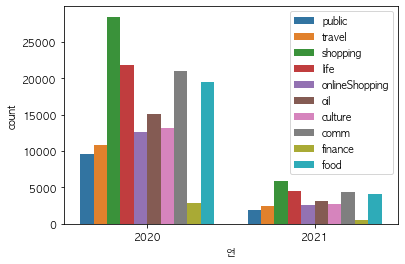

In [30]:
sns.countplot(x="연", hue="혜택분야", data=df)
plt.legend(loc='upper right')
plt.show()

연도별로 큰 차이 없음

### 성별 혜택분야 수 

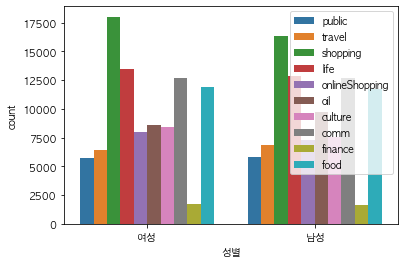

In [31]:
sns.countplot(x="성별", hue="혜택분야", data=df)
plt.legend(loc='upper right')
plt.show()

성별로도 차이가 없음

### 지역별 혜택분야 수

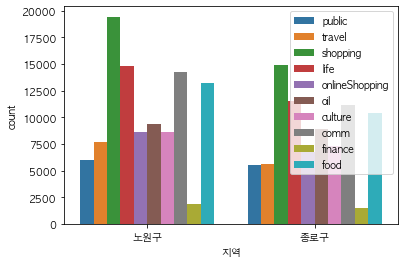

In [32]:
sns.countplot(x="지역", hue="혜택분야", data=df)
plt.legend(loc='upper right')
plt.show()

지역별 혜택분야 수는 큰 차이 없음